### Виконати фільтрацію Гауса з різними значеннями параметрами ядра розмиття.

In [9]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [10]:
def plot_cv_img(input_image, output_image, use_custom = True): 
    """ 
    Converts an image from BGR to RGB and plots 
    """

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 15)) 
    ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)) 
    ax[0].set_title('Input Image', fontsize = 20) 
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    if use_custom:
        ax[1].set_title('Custom Gaussian Blurred', fontsize = 20)
    else:
        ax[1].set_title('OpenCV Gaussian Blurred', fontsize = 20) 
    ax[1].axis('off')
    plt.show() 


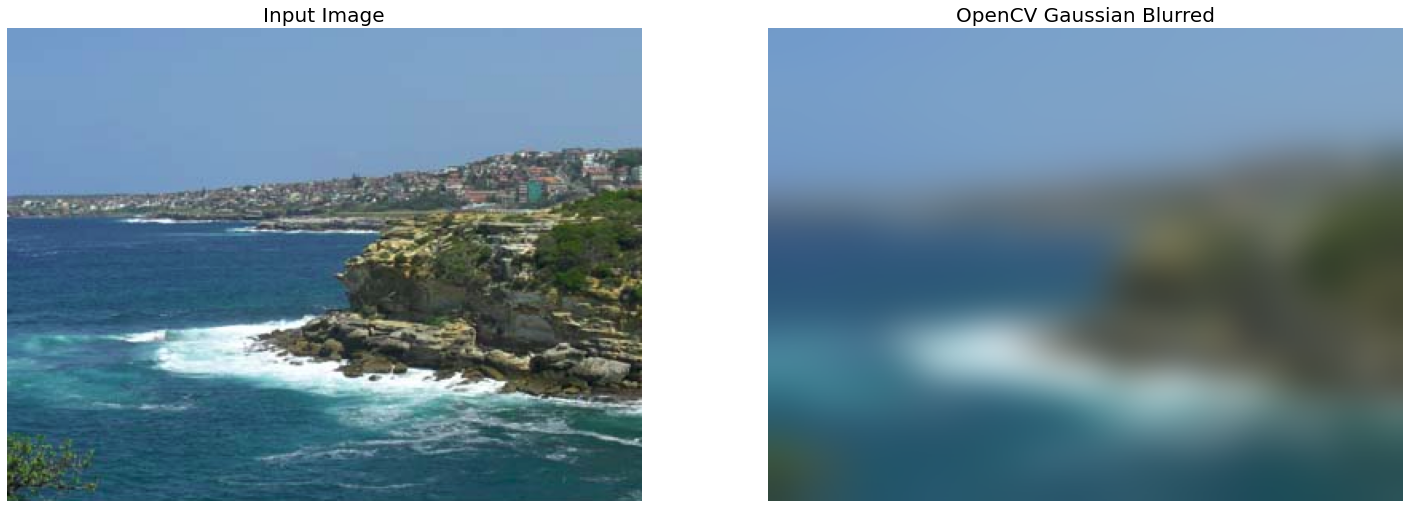

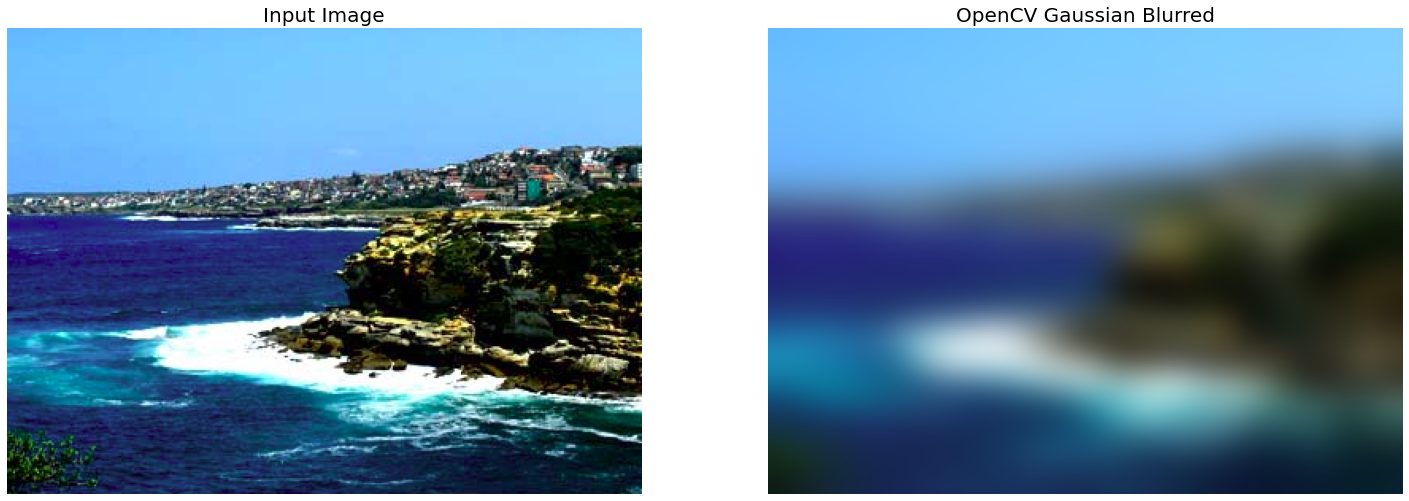

In [11]:
def main(): 
    # read an image 
    img = cv2.imread('contrast_1.png') 
    # apply gaussian blur, 
    # kernel of size 5x5, 
    # change here for other sizes 
    kernel_size = (75,75) 
    # sigma values are same in both direction 
    blur = cv2.GaussianBlur(img,kernel_size, 0) 
    plot_cv_img(img, blur, 0) 
    
    img = cv2.imread('contrast_2.png')
    blur = cv2.GaussianBlur(img, kernel_size, 0)
    plot_cv_img(img, blur, 0) 

    
    
if __name__ == '__main__': 
    main()

In [12]:
def dnorm(x, mu, sd):
    return 1 / np.sqrt(2 * np.pi * np.power(sd, 2)) * np.e ** (-np.power((x - mu), 2) / (2 * np.power(sd, 2)))

In [13]:
def gaussian_kernel(kernel_size, sigma=1):
    kernel = [dnorm(x, kernel_size//2, sigma) for x in range(kernel_size)]
    kernel = np.outer(kernel, kernel)
    kernel = kernel/np.sum(kernel)
 
    return kernel

In [14]:
def gaussian_blur(image, kernel_size):
    kernel = gaussian_kernel(kernel_size, sigma=np.sqrt(kernel_size))
    
    filtered_image = np.zeros_like(image)
    
    for c in range(3):
        filtered_image[:, :, c] = convolution(image[:, :, c], kernel)    
    
    return filtered_image

In [15]:
def convolution(image, kernel):

    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_pad = np.pad(image, pad_width=((h, h),(w, w)))
    image_pad_h, image_pad_w = image_pad.shape
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad_h-h):
        for j in range(w, image_pad_w-w):

            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            image_conv[i][j] = np.dot(kernel.flatten(), x.flatten())
  
    return image_conv[h: -h, w: -w]

Kernel Gaussian size: 5x5


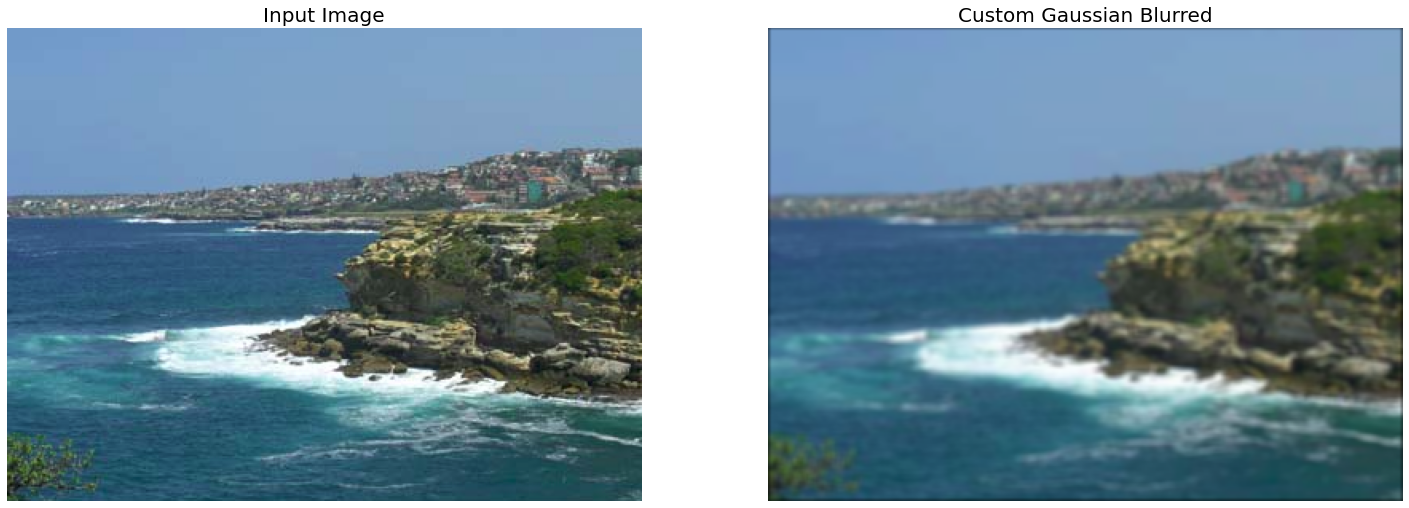

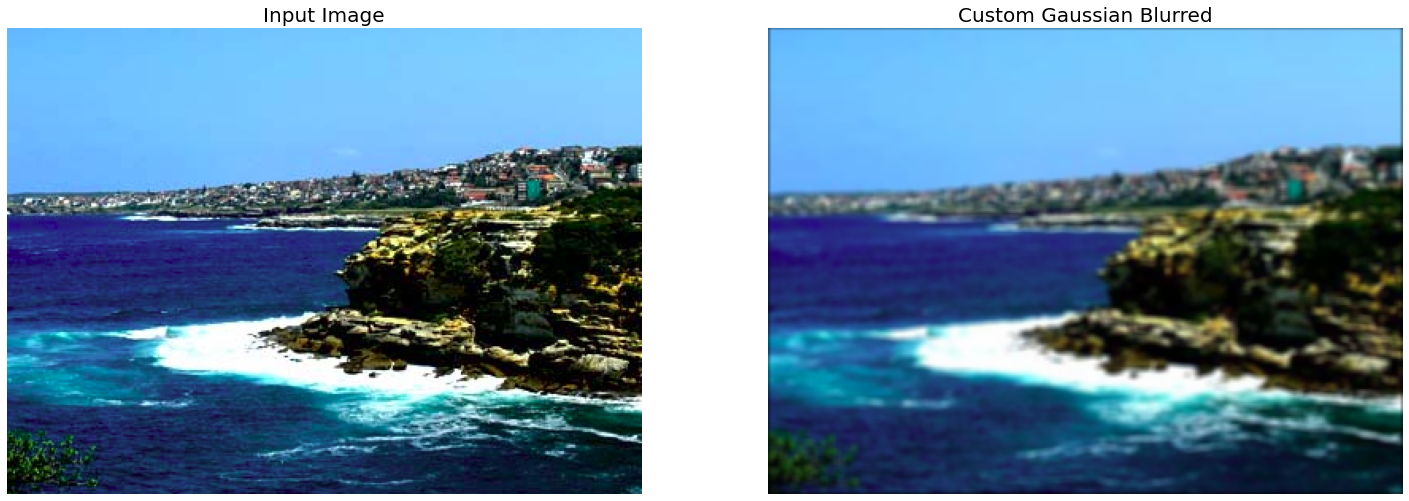

Kernel Gaussian size: 25x25


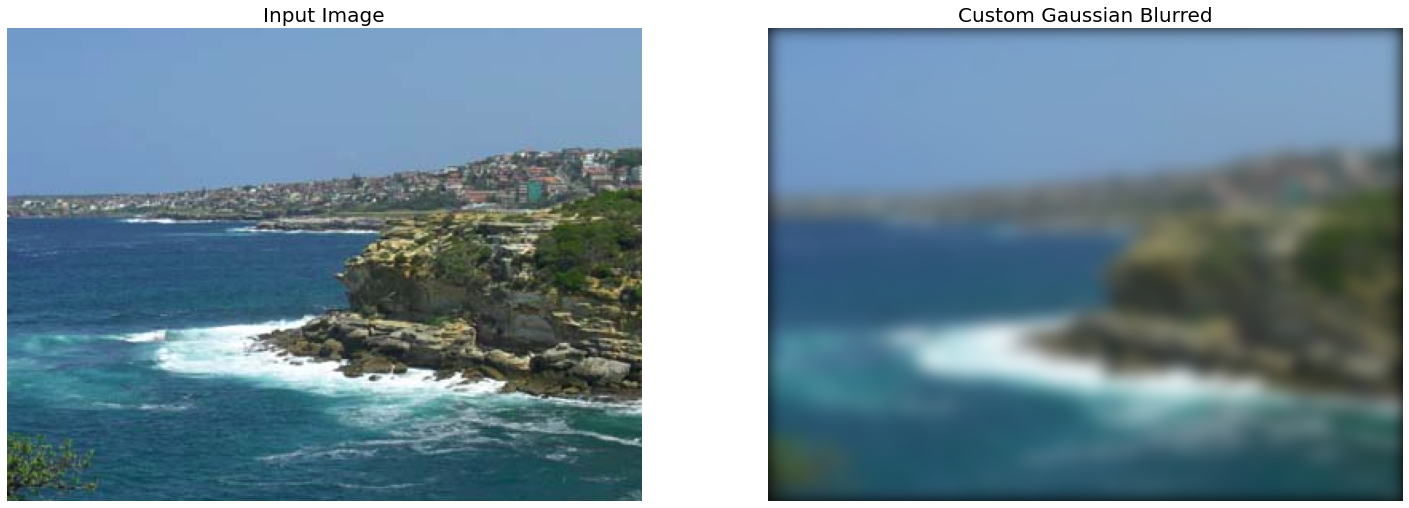

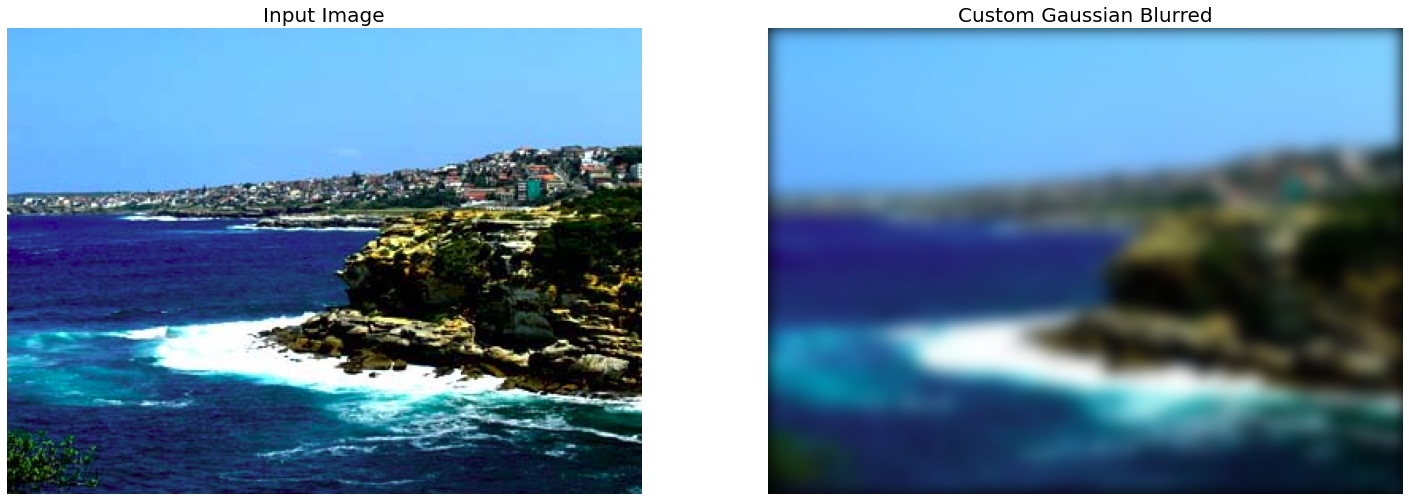

Kernel Gaussian size: 75x75


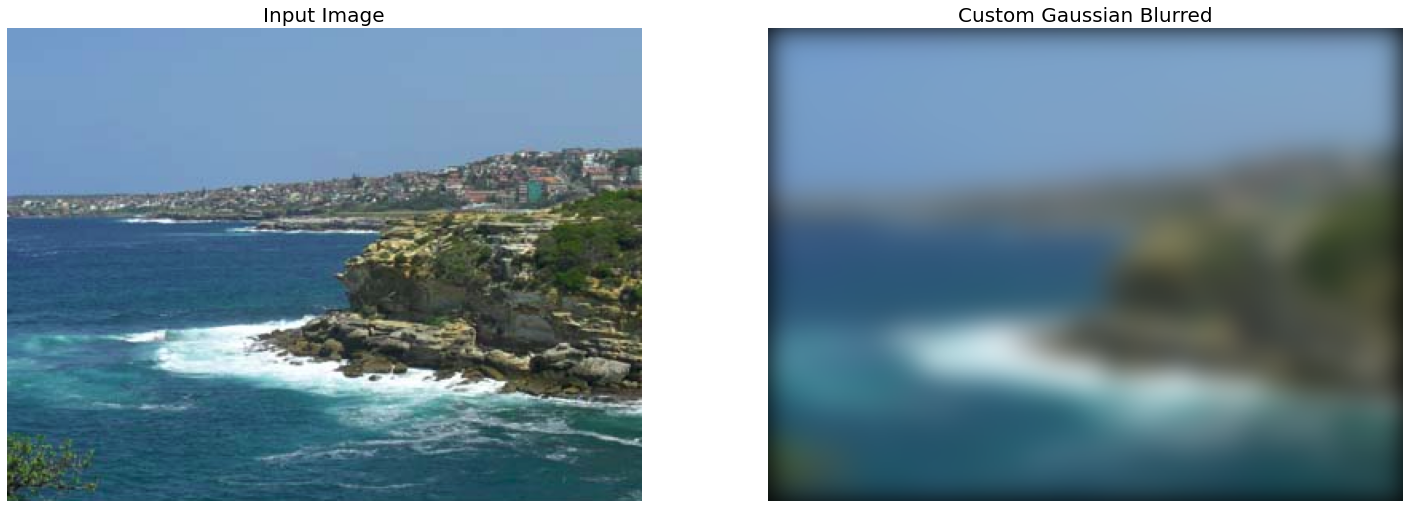

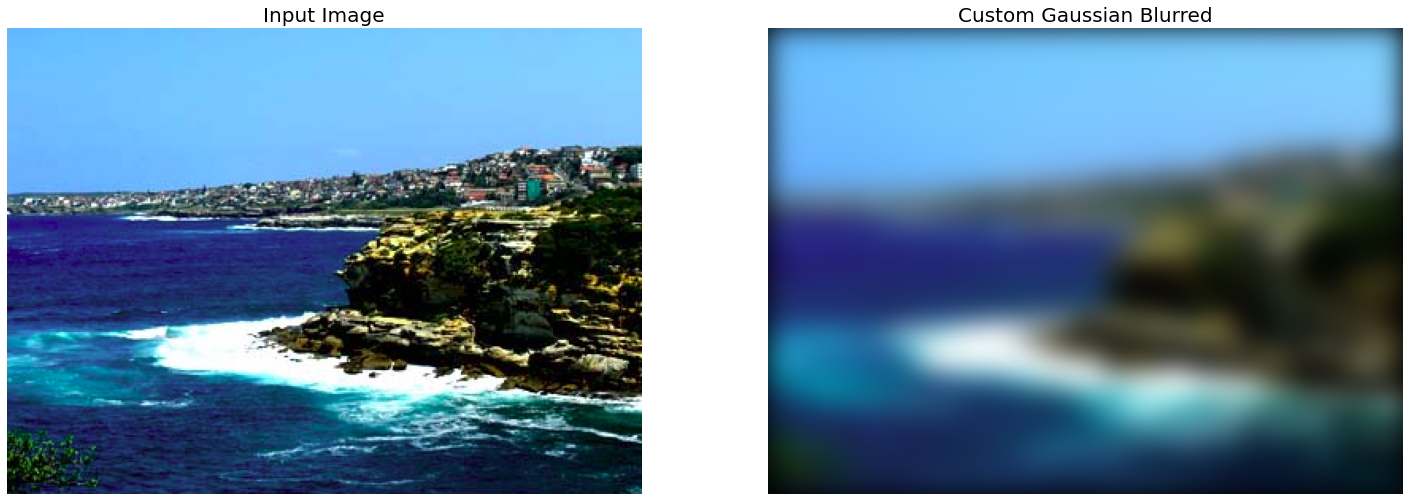

In [16]:
if __name__ == '__main__':
    kernel_sizes = [5, 25, 75]
    for kernel_size in kernel_sizes:
        print(f'Kernel Gaussian size: {kernel_size}x{kernel_size}')

        img = cv2.imread('contrast_1.png')
        blur = gaussian_blur(img, kernel_size)
        plot_cv_img(img, blur) 

        img = cv2.imread('contrast_2.png')
        blur = gaussian_blur(img, kernel_size)
        plot_cv_img(img, blur) 
    